In [1]:
!pip install retrying

You should consider upgrading via the '/Users/JackField/miniconda3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
### Set your API Key

%set_env QI_API_KEY = VE3SLeAb1y9x5vAJ6nncd50v3L9tvQZZ6273ggjT

env: QI_API_KEY=VE3SLeAb1y9x5vAJ6nncd50v3L9tvQZZ6273ggjT


In [26]:
### Download Qi_wrapper from https://github.com/Quant-Insight/API_Starter_Kit

import Qi_wrapper
import pandas
import numpy as np

In [27]:
### Variables

benchmark_name = 'SPX'
date = '2020-03-16'
term = 'Long Term'

In [28]:
### Create Portfolio with positions and weights

portfolio = pandas.DataFrame({'Name':['MSFT','GOOG','PG','JPM','AAPL','FB','GS','MRO','DEI','SO'],
            'Position':[194300000,142000000,122440000,122440000,113940000,109690000,106290000,102040000,102040000,99060000]})
                  
portfolio['Weight'] = [abs(x)/sum(abs(portfolio.Position)) for x in portfolio.Position]
portfolio['L/S'] = [1]*len(portfolio)

In [29]:
### Creates cash exposure table

Qi_wrapper.get_portfolio_cash_exposures_bucket(portfolio,date)

,CB rate expectations,Corp credit,DM FX,EM FX,EM Sov Risk,Energy,Global Growth,Global Real Rates,Infl. Expec.,Metals,Peripheral EU Sov Risk,QT Expectations,Risk Aversion,Systemic liquidity,Yield Curve Slope
MSFT,17117.830,-5.086774e+05,242505.830,-913637.460,-875204.920,288962.960,1142231.410,7.578283e+05,1.174407e+06,978708.530,415627.130,-3858370.540,-2.500058e+05,7.619086e+05,667731.380
GOOG,864567.000,-2.987169e+06,-404501.200,-50040.800,212602.400,-73541.800,156753.800,3.629662e+06,2.119180e+06,-2562816.000,-260172.400,980396.400,-1.411608e+06,3.167196e+06,-1449976.200
PG,-253279.384,-5.330425e+05,-19272.056,198548.704,-301337.084,170277.308,27108.216,-9.252301e+05,1.206279e+05,337285.468,325151.664,279555.008,-9.234180e+05,-4.011624e+05,192549.144
JPM,430364.356,-4.757137e+06,-613987.624,707813.396,-196589.664,232317.656,-103523.020,1.925540e+06,2.494837e+06,-2601543.900,341179.060,3081557.676,-3.871896e+06,2.632582e+06,-1503612.176
AAPL,1129954.374,-4.497690e+06,-836604.450,836217.054,858446.748,-239536.062,-711008.388,4.257448e+06,2.322245e+06,-4509175.500,-524659.518,4963739.130,-2.582188e+06,3.910831e+06,-2646735.048
FB,-100136.001,-1.335607e+06,-19667.417,-97887.356,-577375.253,266974.491,440405.350,-4.182480e+04,9.380798e+05,189555.289,440986.707,-787508.386,-1.364895e+06,4.388807e+05,147061.383
GS,407569.005,-3.674658e+06,-501082.947,564782.544,-42781.725,131565.762,-144458.739,1.740159e+06,1.922733e+06,-2223331.704,175272.210,2596197.024,-2.878907e+06,2.180922e+06,-1289308.329
MRO,-346680.900,-8.289301e+06,-210916.680,-571903.588,-3209545.752,1489386.044,2532285.864,6.849027e+05,5.833872e+06,430884.308,2424745.908,-4224680.488,-8.055354e+06,3.279423e+06,469210.532
DEI,-223181.888,-1.842822e+06,-131937.720,290334.412,-551505.792,311048.532,168549.672,-6.383622e+05,8.882378e+05,-29571.192,551720.076,531893.704,-2.103891e+06,1.950495e+05,-6081.584
SO,-142161.006,-7.366696e+05,-22595.586,66231.516,-328017.378,167371.776,155454.858,-4.087810e+05,3.924163e+05,183211.470,295803.066,-94592.394,-9.120751e+05,-5.586984e+03,117108.732


In [32]:
### Gets portfolio sensitivites to top 15 macro factors

sens = Qi_wrapper.get_portfolio_sens_exposures_factor(portfolio,date)
sens[abs(sens.loc['Total']).nlargest(10).index].loc[['Total']]

,JPY 1y Basis Swap,US HY,Itraxx Xover,Iron Ore,VDAX,EUR 1y Basis Swap,VIX,VXEEM,FinSub Credit,Itraxx Japan
Total,0.7221,-0.648965,-0.644205,-0.612293,-0.609346,0.608777,-0.575057,-0.570793,-0.558589,-0.54997


In [34]:
### Gets the std's of each of the top 15 macro factors

Qi_wrapper.get_factor_stdevs(benchmark_name,date,term).T[abs(sens.loc['Total']).nlargest(10).index]

,JPY 1y Basis Swap,US HY,Itraxx Xover,Iron Ore,VDAX,EUR 1y Basis Swap,VIX,VXEEM,FinSub Credit,Itraxx Japan
SPX,6.52636,55.72456,53.85484,11.07536,9.6794,4.05366,9.575,8.55821,29.8219,12.03007


In [35]:
### Create pie chart data

import numpy as np

sens_buckets = Qi_wrapper.get_portfolio_sens_exposures_bucket(portfolio,date)
pie_data = sens_buckets.loc[['Total']].T.sort_values(by='Total')[::-1]
pie_data.Total = [abs(x)/abs(pie_data).Total.sum() for x in pie_data.Total]

In [36]:
pie_data

,Total
Infl. Expec.,0.131570
Systemic liquidity,0.116780
Global Real Rates,0.079356
Peripheral EU Sov Risk,0.030247
Global Growth,0.026476
QT Expectations,0.025063
Energy,0.019835
CB rate expectations,0.012893
EM FX,0.007447
DM FX,0.018197


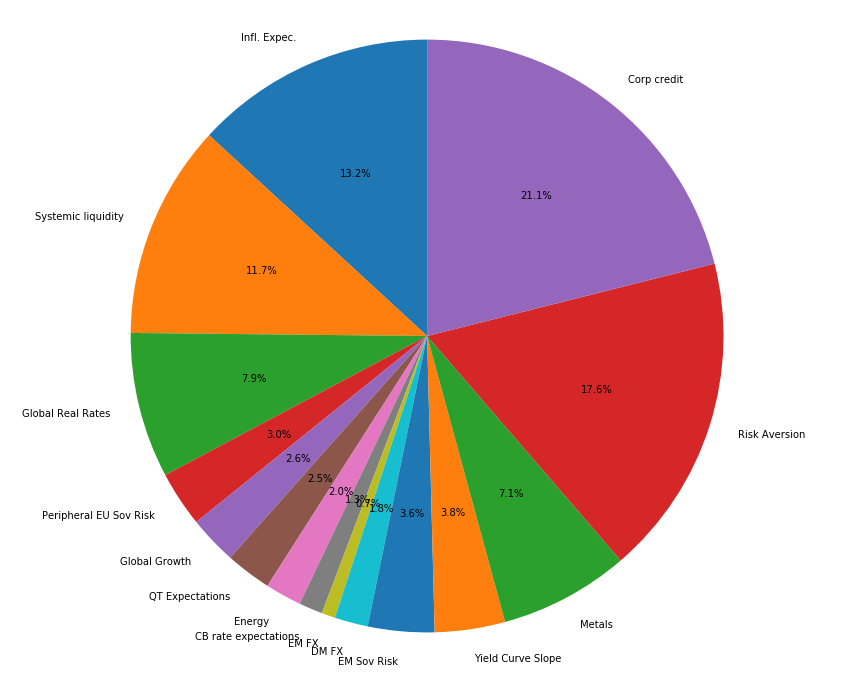

In [37]:
### Plot pie chart

import matplotlib.pyplot as plt


labels = pie_data.index
sizes = pie_data.Total

fig1, ax1 = plt.subplots(figsize=(15, 12))


ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [38]:
### Creates data for bar and scatter plot (Risk relative to benchmark)

bar_plot_data = sens_buckets.loc[['Total']].T.sort_values(by='Total')[::-1]

benchmark = Qi_wrapper.get_bucket_drivers(benchmark_name,date,term)

idxs = bar_plot_data.index.tolist()

bar_plot_data[benchmark_name] = benchmark[idxs].T.Sensitivity

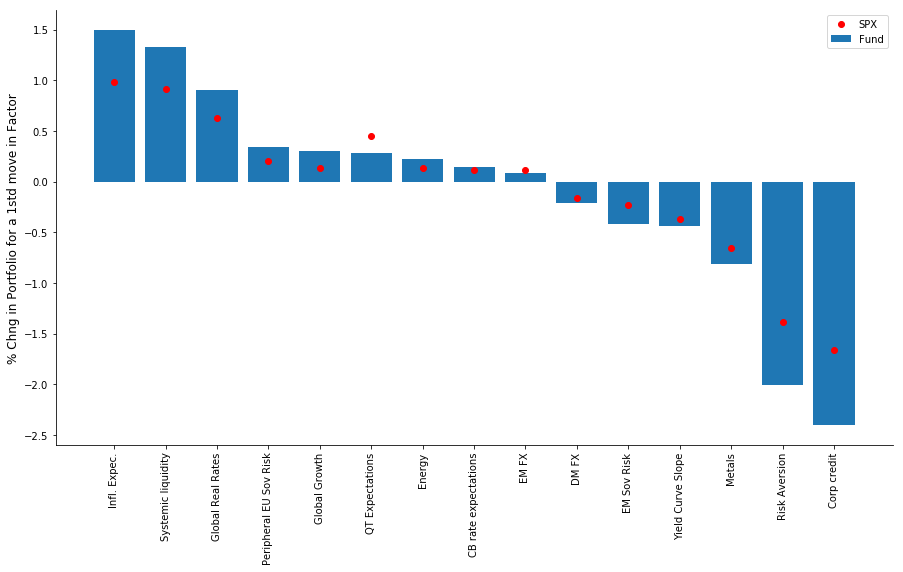

In [39]:
### Plot sensitivities relative to a benchmark

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.bar(bar_plot_data.index,bar_plot_data.Total,zorder=1)
ax.scatter(bar_plot_data.index,bar_plot_data.SPX,zorder=2,color='red')
plt.xticks(rotation='vertical')
plt.ylabel('% Chng in Portfolio for a 1std move in Factor',size=12)
plt.legend([benchmark_name,'Fund'])
plt.show()